# Week 05 Exercises
### 5.1 Dissolving and Aggregating Data
Let's revisit the dataset from last week, the Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. You can access this dataset by navigating to ```data/Justice_Equity_Need_Index.geojson```

Let's start doing some spatial analysis.

1. Load the JENI dataset and view the first few rows. You will notice a column ```sup_dist``` which designates the district number associated with each zip code block. Dissolve by the districts column and use and aggregation function to find the mean ```jenipctl```. 
2. Create a map that displays the dissolved dataframe with a lengend showing the districts and the mean ```jenipctl```
3. Write a meaningful caption of the map you have created. Refer back to last week's homework for additional information on what exactly the ```jenipctl``` means.


In [74]:
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from shapely.geometry import box
import geopandas as gpd

In [2]:
data_path = 'data/Justice_Equity_Need_Index.geojson'

In [3]:
df = gpd.read_file(data_path)
df.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


,OBJECTID,zip,jenicategory,jenipctl,jenirank,riskcategory,riskpctl,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length,SHAPE_Area,geometry
0,1,91108,Lowest,0.0,277,Lowest,0.4,Lowest,0.7,Lowest,3.3,San Marino,District 5,SPA 3 - San Gabriel,City of San Marino,0.177419,0.000962,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,2,90631,Lowest,0.4,276,Lowest,2.9,Lowest,1.8,Lowest,0.7,La Habra Heights,District 4,SPA 7 - East,City of La Habra Heights,0.234952,0.001614,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,3,90274,Lowest,0.7,275,Lowest,3.6,Lowest,0.0,Lowest,7.2,Palos Verdes Estates,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.563332,0.003029,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,4,91361,Lowest,1.1,274,Lowest,12.2,Lowest,0.4,Lowest,5.1,Westlake Village,District 3,SPA 2 - San Fernando,City of Westlake Village,0.197748,0.001336,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,5,90275,Lowest,1.4,273,Lowest,6.8,Lowest,3.6,Lowest,6.2,Rancho Palos Verdes,District 4,SPA 8 - South Bay,City of Rancho Palos Verdes,0.624171,0.003365,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."


In [4]:
districts = df[['sup_dist','jenipctl','geometry']]
agg_districts = districts.dissolve(by='sup_dist', aggfunc='mean')
agg_districts

,geometry,jenipctl
sup_dist,,
District 1,"MULTIPOLYGON (((-118.18311 33.99633, -118.1833...",60.502222
District 2,"POLYGON ((-118.37791 33.85345, -118.37791 33.8...",65.157143
District 3,"POLYGON ((-118.52451 34.03052, -118.52502 34.0...",38.586667
District 4,"MULTIPOLYGON (((-118.17124 33.76274, -118.1725...",51.292857
District 5,"POLYGON ((-118.31103 34.10656, -118.31103 34.1...",41.464286


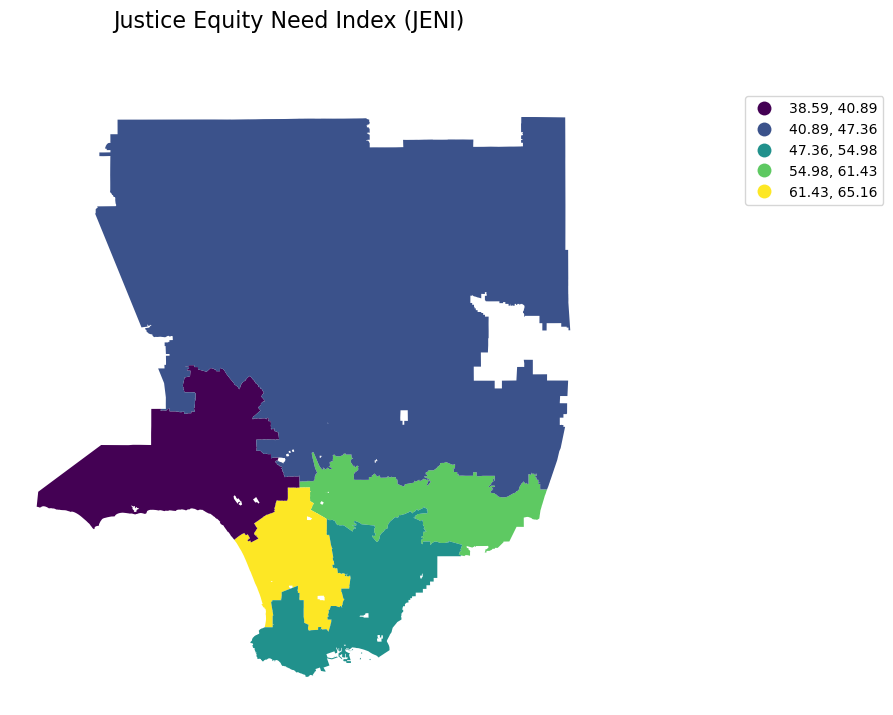

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))

agg_districts.plot(column = 'jenipctl',
                   legend=True,
                   scheme="quantiles",
                   ax=ax)
plt.suptitle('Justice Equity Need Index (JENI)', fontsize=16)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.5,1))

ax.set_axis_off()

plt.show()

In [ ]:
#This map demonstrates which districts in the Los Angeles county are in greatest need of help based on a variety of factors such as adult probation, unemployment ect. Data for each zip code were from the Justice Equity Need Index.  
 

### 5.2 Spatial Joining
Let's use the same ```data/Justice_Equity_Need_Index.geojson``` and do an analysis just for the neighborhoods within the city of Long Beach. You have been provided two additional datasets. First is the boundary of Long Beach: ```data/LB_City_Boundary.geojson``` and the second is Long Beach neighborhoods: ```data/LB_Neighborhoods.geojson```

1. Clip the original ```data/Justice_Equity_Need_Index.geojson``` by the city of Long Beach boundary. What should you always first check before working with multiple datasets?
2. Using the clipped version of the JENI dataset, spatially join the ```data/LB_Neighborhoods.geojson``` and your clipped dataset. 
3. Make a map that has different color categories for each Long Beach neighborhood by the ```jenipctl```.
4. Write a meaningful caption describing the patterns you see in Long Beach neighorboods ```jenipctl``` rankings. 


In [6]:
lbc_fp = 'data/LB_City_Boundary.geojson'
lbn_fp = 'data/LB_Neighborhoods.geojson'
lbc_boundary = gpd.read_file(lbc_fp)
lbc_neighborhoods = gpd.read_file(lbn_fp)


In [8]:
print(lbc_boundary.crs)
print(lbc_neighborhoods.crs)
print(agg_districts.crs)
print(df.crs)

epsg:4326
epsg:4326
epsg:4326
epsg:4326


In [38]:
lbc_neighborhoods.head()

,OBJECTID,NEIGHBOR_NAME,GlobalID,created_user,created_date,last_edited_user,last_edited_date,SHAPE_Length,SHAPE_Area,geometry
0,1,East Village,{F64F07BE-5FA5-410D-88C1-B66CA53D38DF},None,NaT,None,NaT,0.033715,0.000069,"MULTIPOLYGON (((-118.18702 33.77534, -118.1863..."
1,2,Bluff Heights,{99E88FB4-E7F9-4AC3-B341-AB8E56AE9A31},None,NaT,None,NaT,0.041252,0.000067,"MULTIPOLYGON (((-118.15569 33.77171, -118.1545..."
2,3,Stoney Brook,{09F3E3ED-8CA1-41C5-AD87-1B1E2EEA7231},None,NaT,None,NaT,0.012744,0.000009,"MULTIPOLYGON (((-118.12099 33.77406, -118.1197..."
3,4,Bluff Park,{B817207F-7E13-47F8-BF14-41EB6EEC6AD8},None,NaT,None,NaT,0.041761,0.000066,"MULTIPOLYGON (((-118.15353 33.76444, -118.1524..."
4,5,CSULB,{34BB6FE3-315A-4B47-8578-DF606C9FDFA0},None,NaT,None,NaT,0.059820,0.000176,"MULTIPOLYGON (((-118.10798 33.78870, -118.1079..."


In [30]:
df_clipped_to_lbc = gpd.clip(lbc_boundary, df)

/opt/tljh/user/lib/python3.9/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [31]:
df_clipped_to_lbc.head()

,OBJECTID,CITYNAME,CITYCODE,SHAPE_Length,SHAPE_Area,geometry
0,1,LONG BEACH,CLB,1.232684,0.01338,"MULTIPOLYGON (((-118.18174 33.88541, -118.1788..."


In [45]:
joined_lbc = gpd.sjoin(lbc_neighborhoods,
                       df,
                       how = 'inner',
                       op = 'intersects'
                      )
joined_lbc.head(10)

/opt/tljh/user/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,OBJECTID_left,NEIGHBOR_NAME,GlobalID,created_user,created_date,last_edited_user,last_edited_date,SHAPE_Length_left,SHAPE_Area_left,geometry,...,driverscategory,driverspctl,systemcategory,systempctl,neighborhood,sup_dist,spa,csa,SHAPE_Length_right,SHAPE_Area_right
0,1,East Village,{F64F07BE-5FA5-410D-88C1-B66CA53D38DF},None,NaT,None,NaT,0.033715,0.000069,"MULTIPOLYGON (((-118.18702 33.77534, -118.1863...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
5,6,Willmore,{1ACDFFF5-68A5-4A02-B766-9B9546CA4DFE},None,NaT,None,NaT,0.037115,0.000075,"MULTIPOLYGON (((-118.20467 33.77650, -118.2046...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
38,39,Saint Mary's,{08EF8122-27A6-493C-AFB6-2CAAFAC9CD01},None,NaT,None,NaT,0.044193,0.000106,"MULTIPOLYGON (((-118.18939 33.78259, -118.1886...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
39,40,Rose Park,{AEE872EB-E17F-47B4-B670-23F5ED5E08EA},None,NaT,None,NaT,0.044998,0.000111,"MULTIPOLYGON (((-118.16550 33.77898, -118.1644...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
40,41,West Village,{CE22A43B-FF85-4988-8965-0698278FC88F},None,NaT,None,NaT,0.035150,0.000067,"MULTIPOLYGON (((-118.20314 33.77559, -118.2023...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
41,42,North Alamitos Beach,{367888ED-6523-4630-A7EE-BCD61EE8AF84},None,NaT,None,NaT,0.046081,0.000099,"MULTIPOLYGON (((-118.17792 33.77534, -118.1763...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
42,43,Alamitos Beach,{39989F08-23F8-4EC8-B847-47E35342D1D1},None,NaT,None,NaT,0.049994,0.000092,"MULTIPOLYGON (((-118.16600 33.76633, -118.1663...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
77,78,AOC7,{3BB568CA-CEB8-4609-9944-312AA283185E},None,NaT,None,NaT,0.031934,0.000047,"MULTIPOLYGON (((-118.17527 33.78261, -118.1749...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
85,86,Shoreline,{F70D0A82-326F-4736-BA52-DC952211A11B},None,NaT,None,NaT,0.071685,0.000135,"MULTIPOLYGON (((-118.20223 33.76531, -118.2020...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523
86,87,Port of Long Beach,{DCBAB88D-B490-4B73-B89D-D7DB11B0B7DD},None,NaT,None,NaT,0.422617,0.001334,"MULTIPOLYGON (((-118.20605 33.76387, -118.2060...",...,High,75.300003,Highest,90.900002,Long Beach,District 4,SPA 8 - South Bay,City of Long Beach,0.555848,0.001523


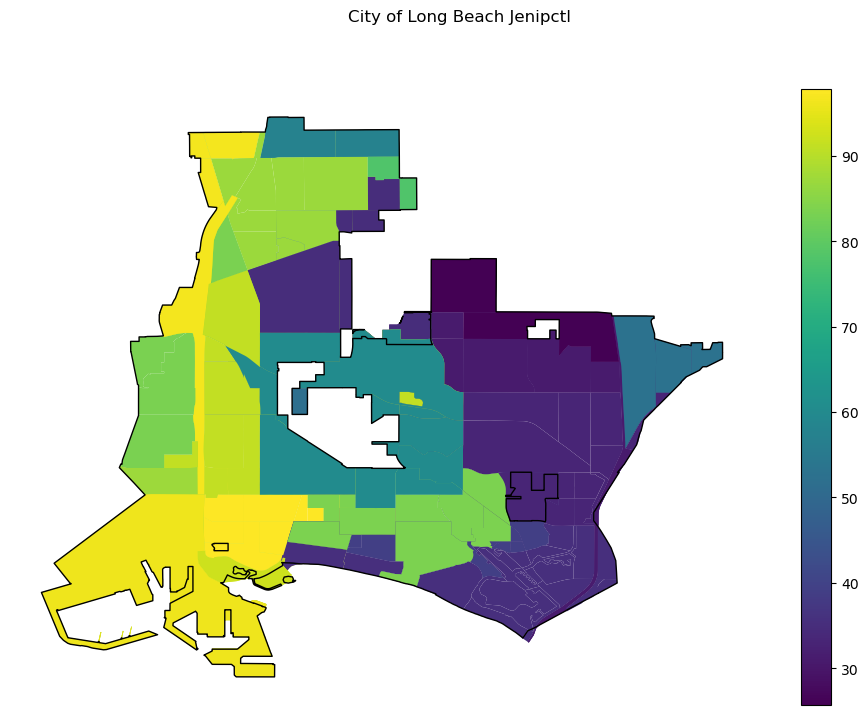

In [43]:
fig, ax = plt.subplots(figsize=(12, 8))

df_clipped_to_lbc.plot(alpha=1,
        facecolor="none",
        edgecolor="black",
        zorder=10,
        ax=ax)

joined_lbc.plot(column='jenipctl',
                ax=ax,
                legend=True)

plt.suptitle('City of Long Beach Jenipctl', fontsize=12)
leg = ax.get_legend()


ax.set_axis_off()
plt.axis('equal')
plt.show()

In [ ]:
#This map distinguishes cities in Long Beach based on their need for help. The color bar demonstrates how high or low these certain cities fall on a scale based on a variety of factors that determine wether a certain are is in need or assitance. 

### 5.3 Calculating Distances
Let's calculate the distance by bird's flight (straight lines) from campus to each zip code. The coordinates of LMU's campus are: 33.9710, -118.4170.

1. The JENI dataset we have been working with has information already grouped by zip code. Load the JENI dataset and select only the ```zip``` and ``` csa ``` columns. 
2. Create the point for LMU's campus assuming the CRS to be ```epsg:4326```. Reproject this point to ```epsg:3857```.
3. Find the centroids of the zip code and city name dataframe (the subset from the JENI dataframe). Did you receive a warning? What should you do?
4. Using the following function, calculate the distance from the LMU campus to each zip code. 
5. What is the maximum distance from the LMU campus? Which zip code does this pertain to? What is the average distace to the LMU campus?

In [108]:
df_selected = df[['zip','csa','geometry']]
df_selected

,zip,csa,geometry
0,91108,City of San Marino,"MULTIPOLYGON (((-118.10864 34.13733, -118.1084..."
1,90631,City of La Habra Heights,"MULTIPOLYGON (((-117.94274 33.97488, -117.9427..."
2,90274,City of Rancho Palos Verdes,"MULTIPOLYGON (((-118.39057 33.80426, -118.3905..."
3,91361,City of Westlake Village,"MULTIPOLYGON (((-118.80028 34.14798, -118.7995..."
4,90275,City of Rancho Palos Verdes,"MULTIPOLYGON (((-118.39313 33.73857, -118.3931..."
...,...,...,...
276,90037,Los Angeles - West Vernon,"MULTIPOLYGON (((-118.28882 34.01835, -118.2878..."
277,90061,Unincorporated - Athens Village,"MULTIPOLYGON (((-118.27330 33.93924, -118.2733..."
278,90059,Unincorporated - Willowbrook,"MULTIPOLYGON (((-118.26514 33.91157, -118.2645..."
279,90014,Los Angeles - Downtown,"MULTIPOLYGON (((-118.25468 34.04862, -118.2544..."


In [109]:
df_selected.isnull().sum()

zip         0
csa         3
geometry    0
dtype: int64

In [110]:
df_selected1 = df_selected.copy()

In [111]:
df_selected1['csa'] = df_selected1['csa'].fillna("Unknown")

In [134]:
from shapely.geometry import Point, LineString, Polygon
lmu_lon = -118.4170
lmu_lat = 33.9710

# Create GeoDataFrame
lmu = gpd.GeoDataFrame([[Point(lmu_lon, lmu_lat)]], geometry='geometry', crs={'init': 'epsg:4326'}, columns=['geometry'])


/opt/tljh/user/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [148]:
lmu = lmu.to_crs(3857)

In [124]:
df_selected1.crs
#crs needed to be changed to a projected crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [135]:
projected_df = df_selected1.to_crs('epsg:3857')

In [136]:
projected_df['centroid'] = projected_df.centroid

In [137]:
projected_df.head()

,zip,csa,geometry,centroid
0,91108,City of San Marino,"MULTIPOLYGON (((-13147794.179 4047256.800, -13...",POINT (-13148349.834 4045245.070)
1,90631,City of La Habra Heights,"MULTIPOLYGON (((-13129326.139 4025429.029, -13...",POINT (-13130220.945 4023406.404)
2,90274,City of Rancho Palos Verdes,"MULTIPOLYGON (((-13179177.697 4002548.915, -13...",POINT (-13176716.971 3998944.034)
3,91361,City of Westlake Village,"MULTIPOLYGON (((-13224787.024 4048688.878, -13...",POINT (-13228375.469 4046330.223)
4,90275,City of Rancho Palos Verdes,"MULTIPOLYGON (((-13179462.784 3993751.501, -13...",POINT (-13176234.604 3996054.498)


In [150]:
lmu_geom = lmu.loc[0,'geometry']
print(lmu_geom)

POINT (-13182120.141267078 4024908.6990536377)


In [151]:
def calculate_distance(row, dest_geom, src_col='geometry', target_col='distance'):
    """
    Calculates the distance between Point geometries.

    Parameters
    ----------
    dest_geom : shapely.Point
       A single Shapely Point geometry to which the distances will be calculated to.
    src_col : str
       A name of the column that has the Shapely Point objects from where the distances will be calculated from.
    target_col : str
       A name of the target column where the result will be stored.

    Returns
    -------
    
    Distance in kilometers that will be stored in 'target_col'.
    """
    
    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

In [154]:
projected_df = projected_df.apply(calculate_distance, dest_geom = lmu_geom, src_col ='centroid', target_col = 'dist_to_lmu', axis=1)
print(projected_df.head(10))

     zip                          csa  \
0  91108           City of San Marino   
1  90631     City of La Habra Heights   
2  90274  City of Rancho Palos Verdes   
3  91361     City of Westlake Village   
4  90275  City of Rancho Palos Verdes   
5  90077        Los Angeles - Bel Air   
6  91436         Los Angeles - Encino   
7  90094    Los Angeles - Playa Vista   
8  91007              City of Arcadia   
9  90049      Los Angeles - Brentwood   

                                            geometry  \
0  MULTIPOLYGON (((-13147794.179 4047256.800, -13...   
1  MULTIPOLYGON (((-13129326.139 4025429.029, -13...   
2  MULTIPOLYGON (((-13179177.697 4002548.915, -13...   
3  MULTIPOLYGON (((-13224787.024 4048688.878, -13...   
4  MULTIPOLYGON (((-13179462.784 3993751.501, -13...   
5  MULTIPOLYGON (((-13186404.303 4046875.374, -13...   
6  MULTIPOLYGON (((-13190575.702 4053817.268, -13...   
7  MULTIPOLYGON (((-13180371.303 4026623.785, -13...   
8  MULTIPOLYGON (((-13141322.535 4048747.758

In [157]:
max_dist = projected_df['dist_to_lmu'].max()
mean_dist = projected_df['dist_to_lmu'].mean()
print("Maximum distance to LMU is %.0f km, and the average distance is %.0f km." % (max_dist, mean_dist))

Maximum distance to LMU is 117 km, and the average distance is 35 km.


In [159]:
max_zip = projected_df.loc[projected_df['dist_to_lmu'] == '117']
max_zip
#I know this only will return the row that has the exact value, the 117 should have the decimals in order for the row to be returned. 

,zip,csa,geometry,centroid,dist_to_lmu
